# 🛍️ Day 3 Challenge

##### Dataset link: "https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis"

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [419]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [420]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [421]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [422]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [423]:
df.duplicated().sum()

0

# Pandas (Data Manipulation)

# Q1: Group and Aggregation:
Group by Education and calculate:
* Average Income
* Total MntWines
* Number of customers per education group

In [426]:
grouped_df = df.groupby("Education").agg({'Income': 'mean', 'MntWines': 'sum', 'ID': 'count'})
grouped_df

,Income,MntWines,ID
Education,,,
2n Cycle,47633.190000,40231,203
Basic,20306.259259,391,54
Graduation,52720.373656,320371,1127
Master,52917.534247,123238,370
PhD,56145.313929,196585,486


# Q2: Datetime Operations:
Convert Dt_Customer to datetime and extract:
* Year and month of joining
* Number of years since joining

In [428]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = 'mixed')
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [429]:
df['Join_year'] = df['Dt_Customer'].dt.year
df['Join_year']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Join_year, Length: 2240, dtype: int32

In [430]:
df['Join_month'] = df['Dt_Customer'].dt.month
df['Join_month']

0        4
1        8
2        8
3       10
4        1
        ..
2235     6
2236    10
2237     1
2238     1
2239    10
Name: Join_month, Length: 2240, dtype: int32

In [431]:
today = datetime.today()
df['years_since_joining'] = (today - df['Dt_Customer']).dt.days //365
df['years_since_joining']

0       13
1       10
2       11
3       10
4       11
        ..
2235    11
2236    10
2237    11
2238    11
2239    12
Name: years_since_joining, Length: 2240, dtype: int64

#  Q3: Apply Function:
Create a column Income_Level:
* "Low" for income < 30,000
* "Medium" for income between 30,000–70,000
* "High" for income > 70,000

In [433]:
def income_level(col):
    if pd.isnull(col):
        return "Unknown"
    if col > 70000:
        return "High"
    elif 30000 <= col <= 70000:
        return "Medium"
    else:
        return "Low"
df['Income_Level'] = df['Income'].apply(income_level)
df['Income_Level']

0       Medium
1       Medium
2         High
3          Low
4       Medium
         ...  
2235    Medium
2236    Medium
2237    Medium
2238    Medium
2239    Medium
Name: Income_Level, Length: 2240, dtype: object

# Visualization

# 1. Bar Plot:
Show average Income by Marital_Status.

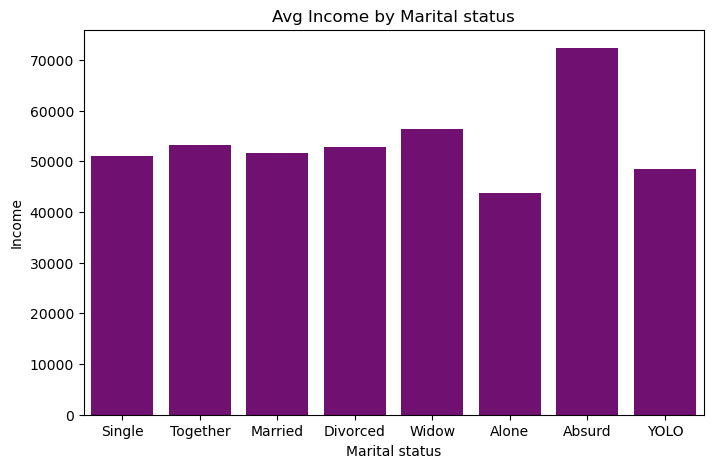

In [436]:
plt.figure(figsize = (8,5))
sns.barplot(y = 'Income', x = 'Marital_Status', data = df, errorbar = None, color = 'purple')
plt.title("Avg Income by Marital status")
plt.xlabel("Marital status")
plt.ylabel("Income")
plt.show()

# 2. Histogram & KDE:
Plot the distribution of MntWines (wine spending) with both a histogram and KDE.

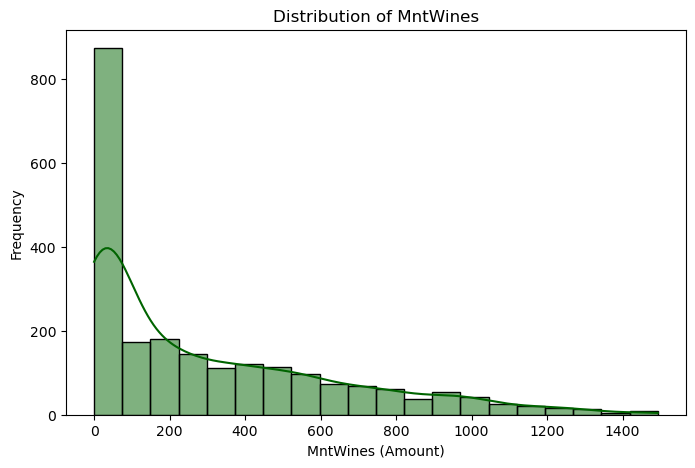

In [438]:
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'MntWines', bins = 20, kde = True, color = 'darkgreen')
plt.title("Distribution of MntWines")
plt.xlabel("MntWines (Amount)")
plt.ylabel("Frequency")
plt.show()

# 3. Box Plot:
Create a boxplot of Income across different Education levels.

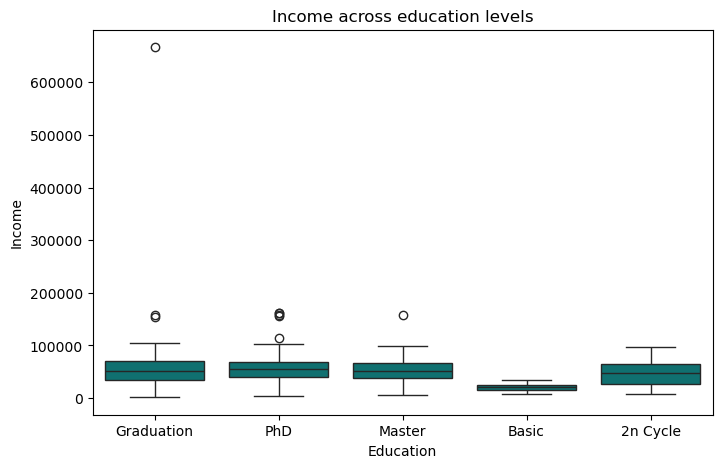

In [440]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'Education', y = 'Income', color = 'teal')
plt.title("Income across education levels")
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()

# Exploratory Data Analysis (EDA)

# 1: Missing Value Report:
* Check for missing values and report counts and percentages.
* Suggest methods to impute or handle them.

In [443]:
missing_count = df.isnull().sum()
missing_count

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Join_year               0
Join_month              0
years_since_joining     0
Income_Level            0
dtype: int64

In [444]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
Join_year              0.000000
Join_month             0.000000
years_si

In [445]:
missing_summary = pd.concat([missing_count, missing_percent], axis = 1)
missing_summary.columns = ['Missing_count', 'Missing_percent']
missing_summary = missing_summary[missing_summary['Missing_count'] > 0]
missing_summary

,Missing_count,Missing_percent
Income,24,1.071429


In [446]:
df['Income'] = df['Income'].fillna(df['Income'].median()) # For numerical column, updated the null values with median

# 2: Outlier Detection:
* Use IQR to detect outliers in the Income column.
* Report how many outliers were found.

In [448]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5 * IQR
UW = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < LW) | (df['Income'] > UW)]
display(outliers)
print(f"\nThere are {len(outliers)} outliers present in Income column.")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Join_year,Join_month,years_since_joining,Income_Level
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,0,0,0,3,11,0,2014,1,11,High
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,...,0,0,0,3,11,0,2013,3,12,High
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,0,3,11,0,2014,7,10,High
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,0,0,0,3,11,0,2012,4,13,High
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,...,0,0,0,3,11,0,2013,4,12,High
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,3,11,0,2013,4,12,High
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,3,11,0,2013,8,11,High
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,0,0,0,3,11,0,2013,2,12,High



There are 8 outliers present in Income column.


# 3: Basic Correlation Analysis:
* Generate a correlation matrix for spending-related columns (MntWines, MntFruits, etc.).
* Visualize using a heatmap and summarize key correlations.

In [450]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
corr_matrix = df[spending_cols].corr()
corr_matrix

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
MntSweetProducts,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
MntGoldProds,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


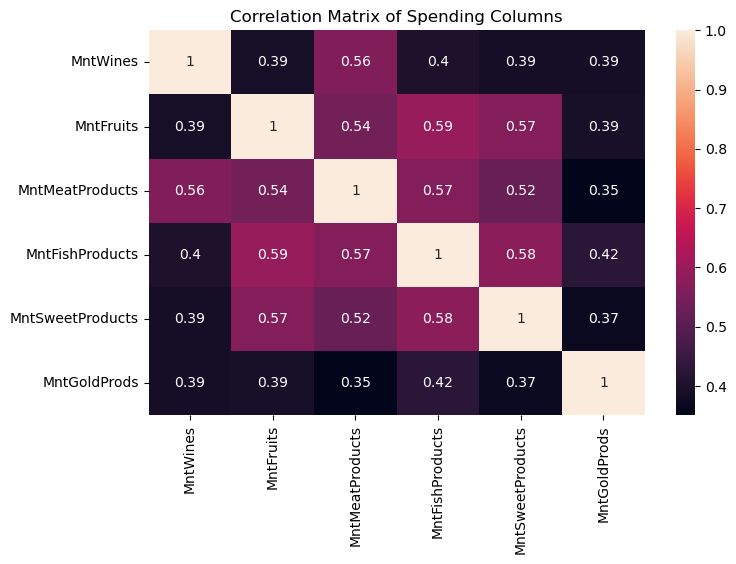

In [451]:
plt.figure(figsize = (8, 5))
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix of Spending Columns")
plt.show()

# Statistics 

# 1: Z-Test
* Test if the average Income is significantly different from $50,000.
* Use sample mean, standard deviation, and assume sample size > 30.

H0: Mu is 50000.
H1: Mu is not 50000.


In [455]:
mean_ = df['Income'].mean()
std_ = df['Income'].std()
n = len(df['Income'])

z_score = (mean_ - 50000) / (std_ / (n ** 0.5))
critical_z = 1.96

# Comparing Z-score with ±1.96
if abs(z_score) > critical_z:
    print("Reject the null hypothesis: Average income is significantly different from $50,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $50,000.")

Reject the null hypothesis: Average income is significantly different from $50,000.


# 2: T-Test (Independent Samples)
* Test whether there is a significant difference in Income between married and single customers.
* (Hint: Use Marital_Status to form two groups.)

* Null hypothesis (H0): There is no significant difference in income between married and single customers.
* Alternative hypothesis (H1): There is a significant difference in income between married and single customers.

In [458]:
married_income = df[df['Marital_Status'] == 'Together']['Income']
single_income = df[df['Marital_Status'] == 'Single']['Income']

t_stat, p_val = stats.ttest_ind(married_income, single_income)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between married and single customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between married and single customers.")

T-Statistic: 1.2479
P-value: 0.2123
Fail to reject the null hypothesis: There is no significant difference in income between married and single customers.
